# Introduction to IRIS Dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import seaborn as sns
import matplotlib.pyplot as plt

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
df= pd.read_csv('../input/iris/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


So what is this petal Length Cm and all  
and what is **sepal** and **petal**  


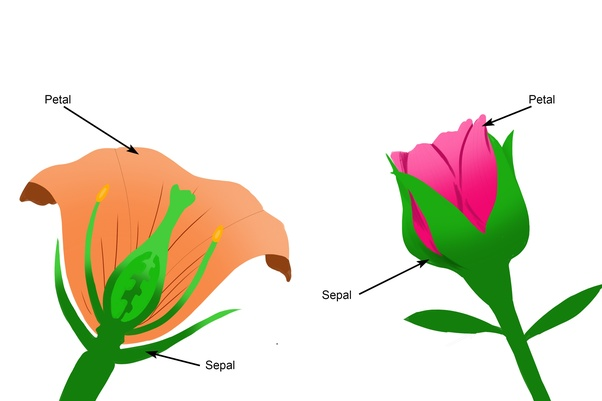

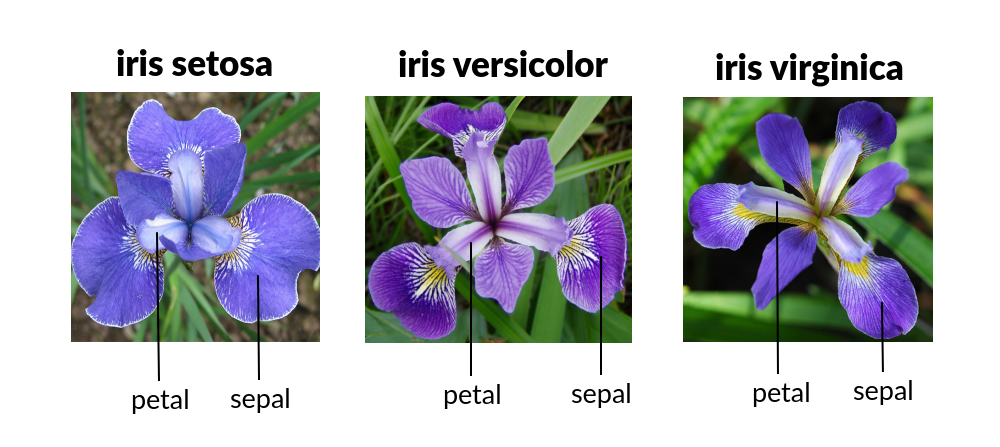

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


What is percentile  
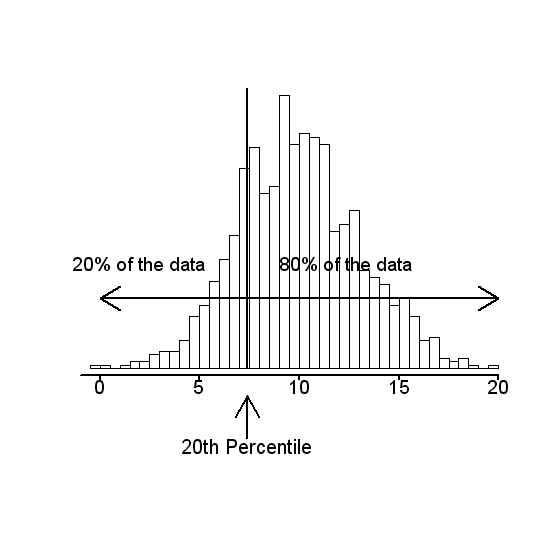

In [5]:
df.duplicated().sum()

0

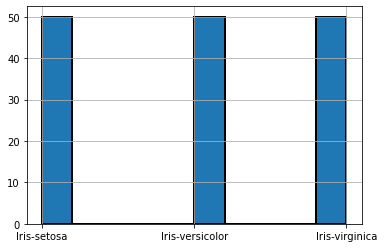

In [6]:
df.Species.hist(edgecolor='black', linewidth=2);

In [7]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df.notna().mean()*100

Id               100.0
SepalLengthCm    100.0
SepalWidthCm     100.0
PetalLengthCm    100.0
PetalWidthCm     100.0
Species          100.0
dtype: float64

Checking for **Skew** and **Kurt**  
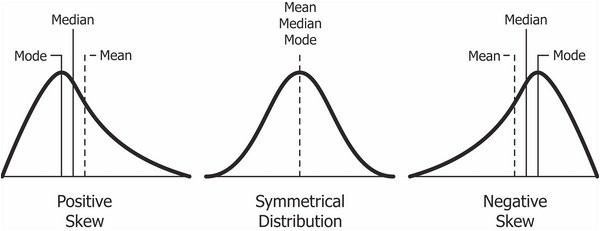

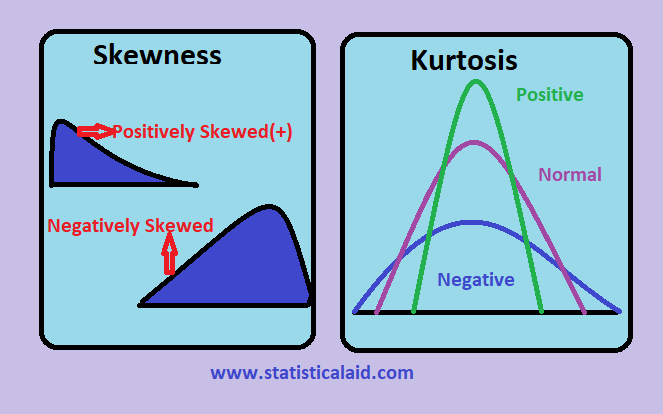

In [9]:
df.skew()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Id               0.000000
SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

In [10]:
### axis =1 for columns
## Axis =0 for rows

df.drop('Id', axis=1, inplace=True)

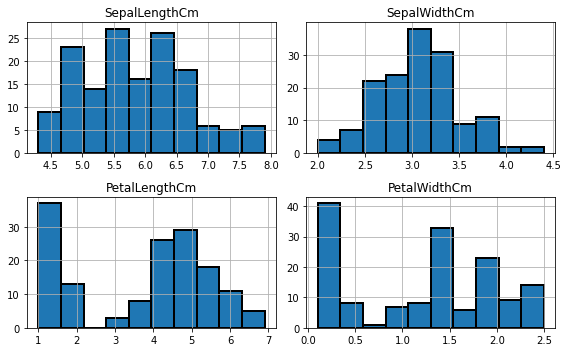

In [11]:
df.hist(edgecolor='Black', linewidth=2, figsize=(8,5));
plt.tight_layout()

*     The Highest frequency of sepal width is between 3.0 to 3.5 which is around 70.
*     The Highest frequency of sepal length is between 5.5 and 6.0 which is around 35.
*     The Highest frequency of petal width is between 0 to 0.5 which is around 50.
*     The Highest frequency of petal length is between 0 to 0.5 which is around 50.

In [12]:
import warnings
warnings.filterwarnings('ignore')

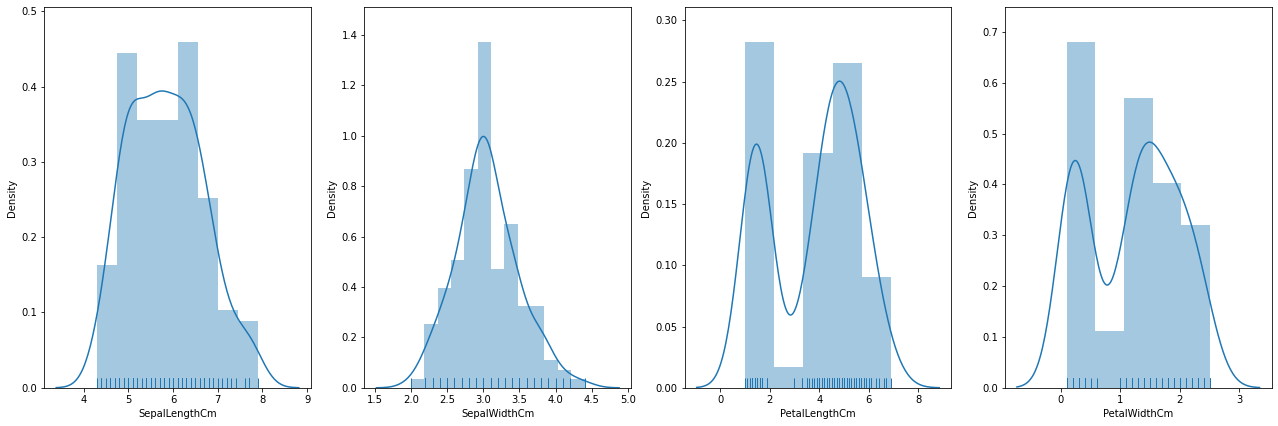

In [13]:
j= 1
plt.figure(figsize=(22,7))
for i in df.select_dtypes('number'):
    plt.subplot(1,4,j)
    sns.distplot(df[i], rug=True );
    j= j+1
plt.show()

[Read more about distribution functions on](https://www.analyticsvidhya.com/blog/2021/07/probability-types-of-probability-distribution-functions/)

In [14]:
df.kurt()

SepalLengthCm   -0.552064
SepalWidthCm     0.290781
PetalLengthCm   -1.401921
PetalWidthCm    -1.339754
dtype: float64

# Vizualization with Seaborn

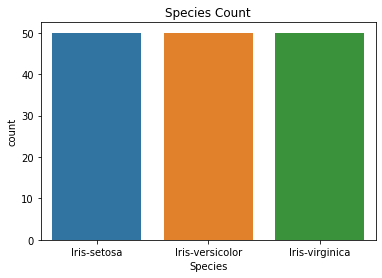

In [15]:
plt.title('Species Count')
sns.countplot(df['Species']);

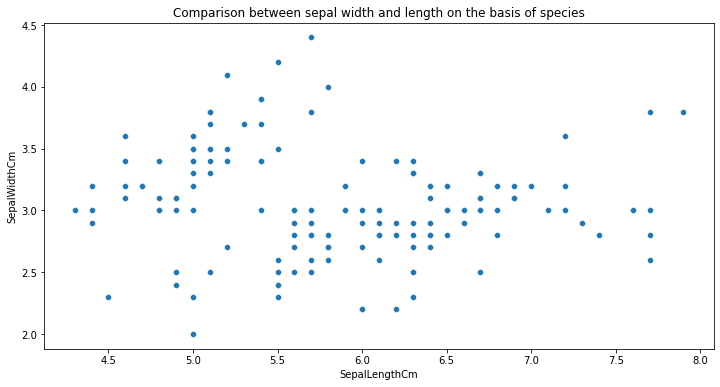

In [16]:
plt.figure(figsize=(12,6))
plt.title('Comparison between sepal width and length on the basis of species')
sns.scatterplot(df['SepalLengthCm'], df['SepalWidthCm']);

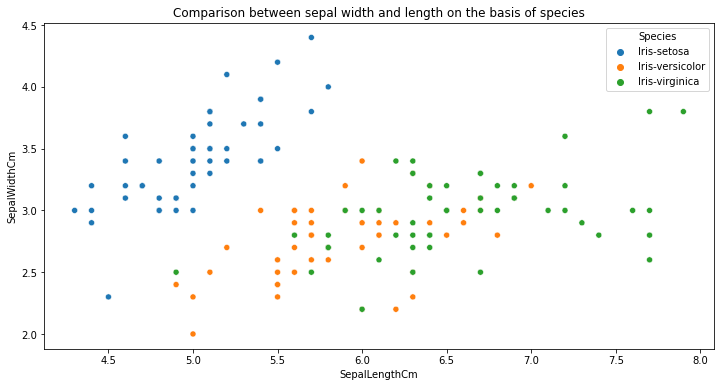

In [17]:
plt.figure(figsize=(12,6))
plt.title('Comparison between sepal width and length on the basis of species')
sns.scatterplot(df['SepalLengthCm'], df['SepalWidthCm'], hue = df['Species']);

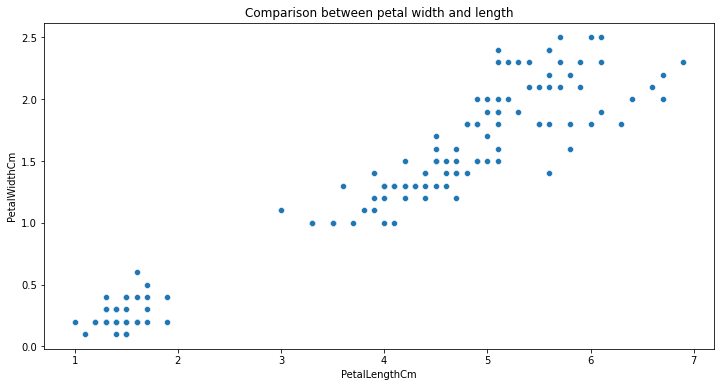

In [18]:
plt.figure(figsize=(12,6))
plt.title('Comparison between petal width and length')
sns.scatterplot(df['PetalLengthCm'], df['PetalWidthCm']);

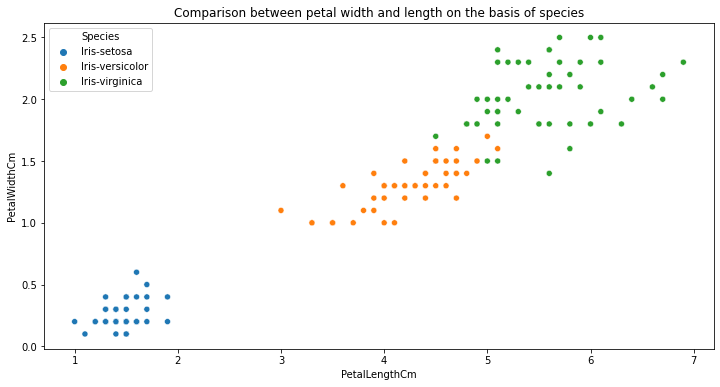

In [19]:
plt.figure(figsize=(12,6))
plt.title('Comparison between petal width and length on the basis of species')
sns.scatterplot(df['PetalLengthCm'], df['PetalWidthCm'], hue = df['Species']);

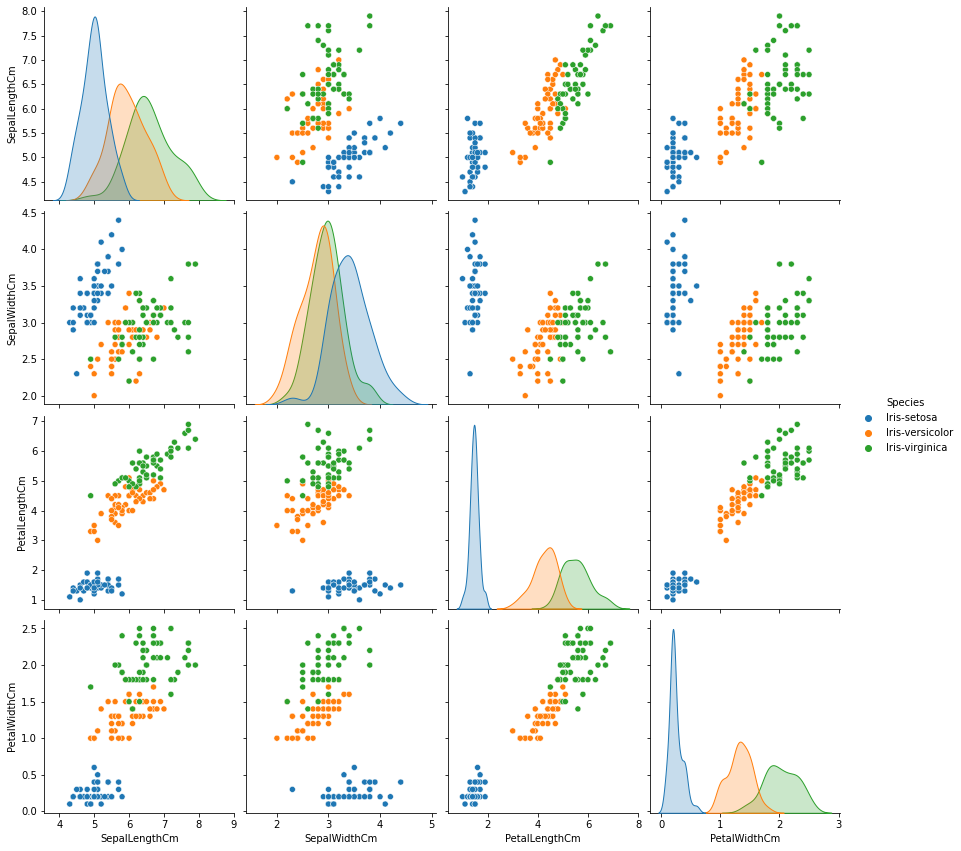

In [20]:
sns.pairplot(df,hue="Species",height=3);

### Correlation Between Variables

In [21]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


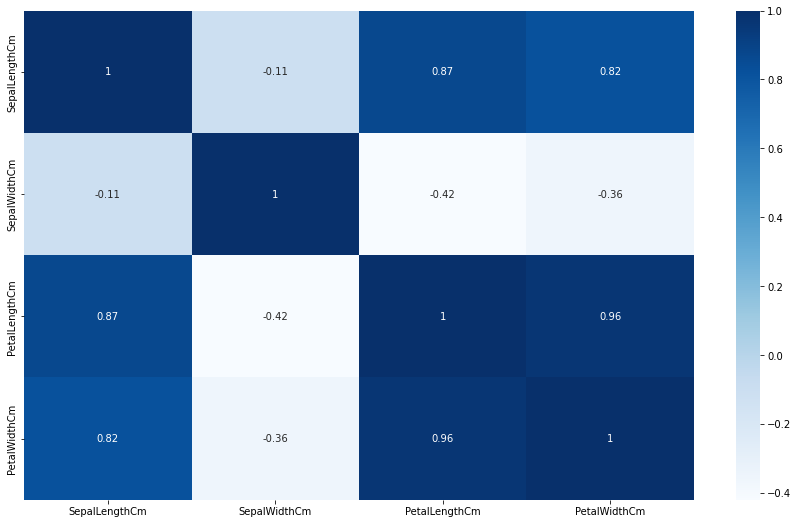

In [22]:
fig = plt.figure(figsize = (15,9))
sns.heatmap(df.corr(), cmap='Blues', annot = True);

## Univariate Analysis of our columns

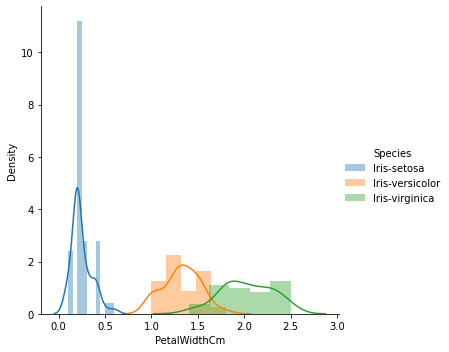

In [23]:
sns.FacetGrid(df,hue="Species",height=5).map(sns.distplot,"PetalWidthCm").add_legend();

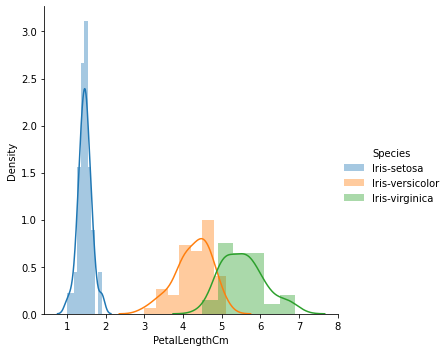

In [24]:
sns.FacetGrid(df,hue="Species",height=5).map(sns.distplot,"PetalLengthCm").add_legend();

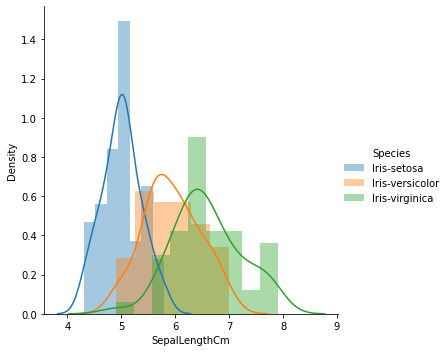

In [25]:
sns.FacetGrid(df,hue="Species",height=5).map(sns.distplot,"SepalLengthCm").add_legend();

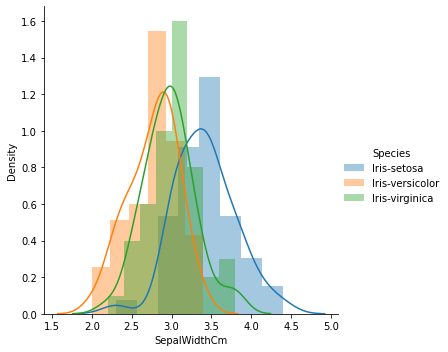

In [26]:
sns.FacetGrid(df,hue="Species",height=5).map(sns.distplot,"SepalWidthCm").add_legend();

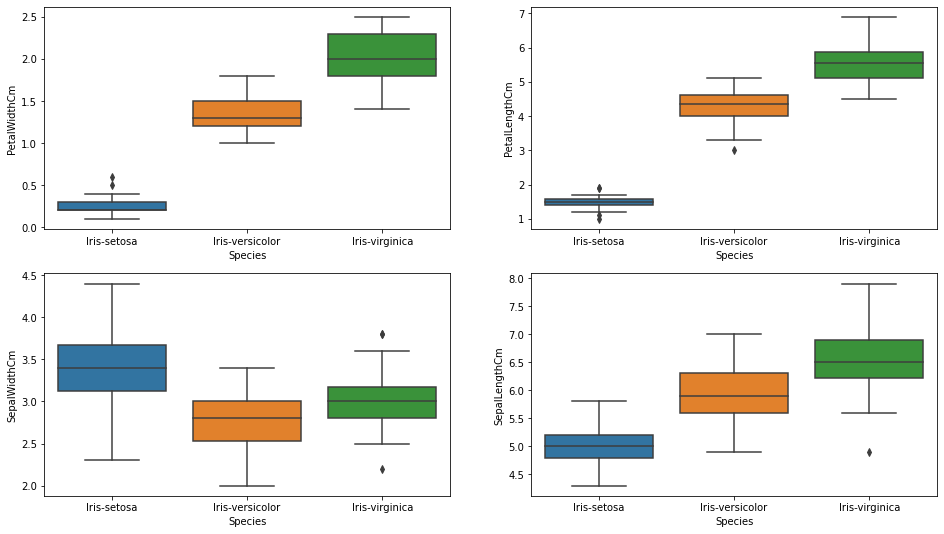

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot(  y="PetalWidthCm",  x= "Species", data=df,  orient='v' , ax=axes[0, 0])
sns.boxplot(  y="PetalLengthCm", x= "Species", data=df,  orient='v' , ax=axes[0, 1])
sns.boxplot(  y="SepalWidthCm",  x= "Species", data=df,  orient='v' , ax=axes[1, 0])
sns.boxplot(  y="SepalLengthCm", x= "Species", data=df,  orient='v' , ax=axes[1, 1])
plt.show()

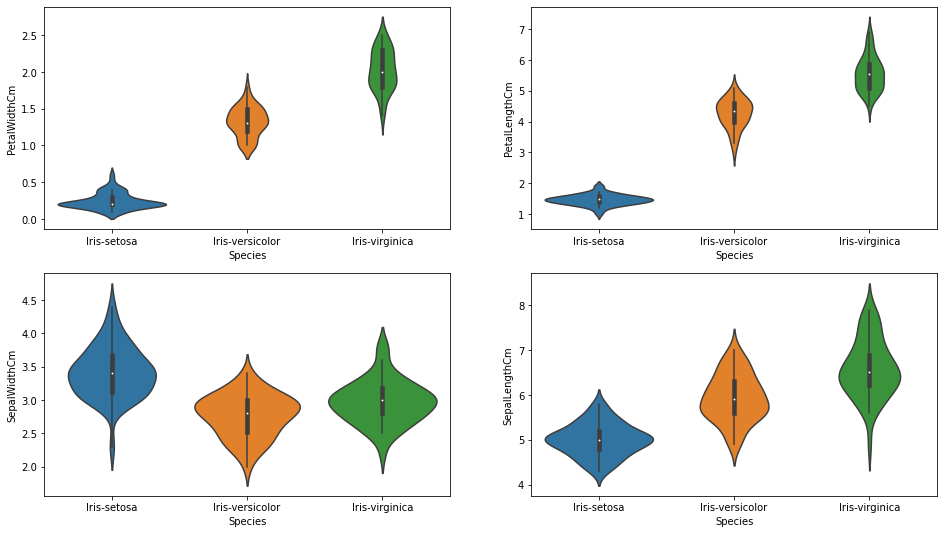

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.violinplot(y="PetalWidthCm",  x= "Species", data=df,  orient='v' , ax=axes[0, 0])
sns.violinplot(y="PetalLengthCm", x= "Species", data=df,  orient='v' , ax=axes[0, 1])
sns.violinplot(y="SepalWidthCm",  x= "Species", data=df,  orient='v' , ax=axes[1, 0])
sns.violinplot(y="SepalLengthCm", x= "Species", data=df,  orient='v' , ax=axes[1, 1])
plt.show()

# Conclusion

*     The dataset is balanced i.e. equal records are present for all three species.
*     We have four numerical columns while just one categorical column which in turn is our target column.
*     A strong correlation is present between petal width and petal length.
*     The setosa species is the most easily distinguishable because of its small feature size.
*     The Versicolor and Virginica species are usually mixed and are sometimes hard to separate, while usually Versicolor has average feature sizes and virginica has larger feature sizes.